# 1 - Introduction

This notebook performs preliminary analysis and exploration of the data. It produces cleaned train and test datasets that require further transformation before they can be used in machine learning models. 

# 1.1 - Load Packages and Global Variables

In [1]:
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import requests

In [2]:
#set project directort path
PROJECT_DIR = os.path.join(os.getcwd(), os.pardir)
os.chdir(PROJECT_DIR)

## 1.2 - Load the Data

Load the data, downloading first if necessary.

In [3]:
try:
    df = pd.read_csv(os.path.join(PROJECT_DIR,"data/external/jokes.csv"),  encoding = "utf-8", index_col = "id")
except FileNotFoundError:
    #if file not present, download it (then load it)
    print("File not found, so downloading it.")
    url = 'https://onedrive.live.com/download?cid=ABD51044F5341265&resid=ABD51044F5341265%21112436&authkey=AFUOwOJbFyY6ZFM'
    out_name = 'data/external/jokes.csv'
    response = requests.get(url, allow_redirects=True)
    with open(out_name, 'wb') as f:
        f.write(response.content)
    #now load it
    df = pd.read_csv(os.path.join(PROJECT_DIR,"data/external/jokes.csv"),  encoding = "utf-8", index_col = "id")
print("File loaded")

File not found, so downloading it.
File loaded


# 2  - Summarize the Data

This section quickly summarizes the data. Let's start by looking at the first 10 observations:

In [4]:
print("There are {} columns.".format(df.shape[1]))
print("There are {} observations.".format(df.shape[0]))
df.head(10)

There are 8 columns.
There are 319747 observations.


,date,downs,score,text,title,ups,upvote_ratio,url
id,,,,,,,,
6z8wju,1.505058e+09,0,1,"She cant make a Yo Mama Joke, oh wait, that’s ...",Yo Mama So Stupid.....,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8wju...
6z8vwj,1.505058e+09,0,0,\nSnacks.,What do cannibals call midgets?,0,0.5,https://www.reddit.com/r/Jokes/comments/6z8vwj...
6z8vgv,1.505058e+09,0,1,I only come once a year,My wife makes me feel like christmas,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8vgv...
6z8vea,1.505058e+09,0,1,Pennywise.,What do you call someone who gets their 1p cha...,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8vea...
6z8v59,1.505058e+09,0,2,A chicken and an egg are lying in bed. The chi...,Who Came First,2,1.0,https://www.reddit.com/r/Jokes/comments/6z8v59...
6z8us8,1.505058e+09,0,2,"""Have you ever been in an railway accident?""\n...",Tom asked Dick,2,1.0,https://www.reddit.com/r/Jokes/comments/6z8us8...
6z8uq9,1.505058e+09,0,0,Woman's husband would always come home drunk. ...,You been drinking tonight?,0,0.5,https://www.reddit.com/r/Jokes/comments/6z8uq9...
6z8uoq,1.505058e+09,0,3,Little Johnny went to visit his grandfather's ...,He's Serving Her,3,1.0,https://www.reddit.com/r/Jokes/comments/6z8uoq...
6z8u74,1.505057e+09,0,2,The party’s host paid me a great compliment. “...,“Imagine how great she’ll look after two.”,2,1.0,https://www.reddit.com/r/Jokes/comments/6z8u74...


We can see that there are 8 columns (9 including the id column). These columns are:

|Variable      | Description |
|:-------      | :------------:|
| **id**           | Unique identifier assigned by Reddit|
| **date**         | Post submission date, in Unix epoch time (seconds since January 1, 1970)
| **downs**        | Number of downvotes. Due to reddit protections, always equal to 0
| **score**        | Net upvotes (fuzzed)
| **text**         | Text of submission/post
| **title**        | Title of submission/post
| **ups**          | Number of upvotes. Due to reddit protections, this is equal to the score variable
| **upvote_ratio** | Upvote ratio, ratio of upvotes to total votes
| **url**          | Link to original post.

In total there are 319747  records. It seems that we have a decent amount of data on hand.

# 3 - Analyze Scores

The ultimate goal of this project is to create a classifier that can correctly predict whether a given joke is funny or not. Since funniness is subjective and hard to measure, the Reddit score will be used as a proxy. I have chosen to use the __score__ variable as a proxy for funniness. Per https://www.reddit.com/wiki/faq#wiki_how_is_a_comment.27s_score_determined.3F, Reddit "fuzzes" this variable in order to hinder spambots and vote manipulation. This means that it is not 100% indicative of the number of net upvotes that a post has received. Nevertheless, the __score__ variable is still the best available proxy for a joke's funniness. However, the fuzzing means that the variable might need to be transformed before it can be used as a target.

## 3.1  - Summary Statistics & Quantiles

Let's start by analyzing the distribution of the __score__ variable. The best place to start is with a few simple summary statistics:

In [5]:
print("Mean score of: {}".format(df.score.mean()))
print("Median score of: {}".format(df.score.median()))
print("Standard deviation: {}".format(df.score.std()))

Mean score of: 157.70866028453747
Median score of: 4.0
Standard deviation: 1428.6994230393627


The above summary statistics are indicative of a variable that is highly skewed, with a long right tail. Let us now compute quantiles for the __score__ variable, along with the share of score that each quintile contains.

In [6]:
percentiles = [1, 5, 10, 25, 50, 60, 75, 90, 95, 99, 100]
values = np.percentile(df.score, q = percentiles)
share = []
for value in values:
    share.append(df[df.score <= value].score.sum() / df.score.sum())

distribution = pd.DataFrame({"percentile" : percentiles,
              "value" : ["{0:.0f}".format(val) for val in values],
              "share of score": share})
distribution

,percentile,share of score,value
0,1,0.000000,0
1,5,0.000000,0
2,10,0.000000,0
3,25,0.000000,0
4,50,0.003567,4
5,60,0.006696,7
6,75,0.017456,20
7,90,0.064009,113
8,95,0.124155,321
9,99,0.342878,2585


The above dataframe confirms that the distribution of scores is very skewed. Over 25% of posts have a score of zero while the top 1% of posts have received 65.7% (1-0.343) of all upvotes.

Now let us visualize the distribution of the cumulative share of score.

In [7]:
#will calculate more percentiles for visualization
#however, not point in plotting percentiles less than 50%, since close 0% of scores.
plot_percentiles = [perc for perc in range(50,100)]
plot_values = np.percentile(df.score, plot_percentiles)
shares = []
for value in plot_values:
    shares.append(df[df.score <= value].score.sum() / df.score.sum())

In [8]:
#color to differentiate the different percentiles
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0, 1.0, len(plot_percentiles)))

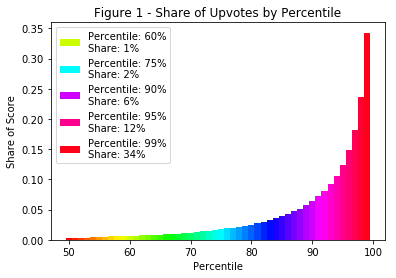

In [9]:
_, ax = plt.subplots()
plt.xlabel('Percentile')
plt.ylabel('Share of Score')
#only want legend for a few of the percentiles
legend_percentiles = [60,75,90,95,99]
for ix, percentile in enumerate(plot_percentiles):
    share = shares[ix]
    #only want a legend for certain percentiles
    #otherwise too cluttered
    if percentile in legend_percentiles:
        legend_label = "Percentile: {0:.0f}%\nShare: {1:.0%}".format(percentile,share)
    else:
        legend_label = "_no_legend"
    ax.bar(percentile,
           share,
           color=colors[ix,:],
           width=1,
           label=legend_label)
ax.legend()
plt.title("Figure 1 - Share of Upvotes by Percentile")
plt.savefig("reports/figures/percentiles.svg")

## 3.2 Funninest Jokes

Let's look at some of the top rated jokes/posts. Are they actually funny?

In [10]:
for ix, row in df.sort_values("ups", ascending = False).iloc[0:5].iterrows():
    print("\n\n   TITLE:")
    print(row["title"])
    print("\n   TEXT:")
    print(row["text"])



   TITLE:
V

   TEXT:
V

*Edit: seems like the ctrl key on my keyboard is not working




   TITLE:
The 2016 US Presidential Election

   TEXT:
That's it. That's the entire fucking joke. 



   TITLE:
Did you hear about the Doctor on the United Flight?

   TEXT:
[removed]


   TITLE:
This is the dirty joke my 85yo grandad told to our whole family by memory

   TEXT:
A male whale and a female whale were swimming off the coast of Japan when they noticed a whaling ship.  The male whale recognized it as the same ship that had harpooned his father many years earlier. He said to the female whale, "Lets both swim under the ship and blow out of our air holes at the same time and it should cause the ship to turn over and sink." They tried it and sure enough, the ship turned over and quickly sank. 

Soon however, the whales realized the sailors had jumped overboard and were swimming to the safety of shore. The male was enraged that they were going to get away and told the female, "Let's swim a

In [11]:
#save the funniest jokes to be used as examples
df.sort_values("score",  ascending = False).iloc[0:100][["ups", "title", "text"]].to_csv("data/processed/funniest_jokes.csv")

## 3.3 Transform Scores

As stated earlier, the __score__ variable is just a proxy for a jokes's funniness. Using it directly as the target variable would be inappropriate, since the resulting models would be highly specific to upvotes on r/jokes subreddit, rather than generalizable to jokes regardless of the source. In addition, as section 3.2 showed, it is highly skewed. The highest rated jokes capture a disproportionate share of the upvotes.

The solution is to transform the __score__ variable into a binary variable. To achieve this, the dataset will be split into three roughly equally sized sets of _Unfunny_, _Neutral_ and _Funny_. Following approach of Bo et al (2002), we will discard neutral jokes. The final targert __funny__ variable will be 1 when a joke is _Funny_ and 0 when a joke is _Unfunny_.

We will start by finding cutoffs that divide the dataset into three equally sized sets.

In [12]:
#if want data set partitioned into equal sizes, use thirds. 
percentiles = [33, 66]
np.percentile(df.score, q = percentiles)

array([  1.,  10.])

Based on the above quantiles, we can class jokes using the following criteria:

|Criteria      | Class |
|:-------      | :------------:|
| _score_ <= 1           | Unfunny|
| 1 < _score_ < 10          | Neutral
| _score_ > 10         | Funny

In [13]:
#classify the jokes using above criteria
df.loc[df.score <= 1, "type"] = "Unfunny"
df.loc[(1 < df.score) & (df.score < 10), "type"] = "Neutral"
df.loc[df.score >= 10, "type"] = "Funny"

#analysis of proportions
prop_unfunny = (df.type == "Unfunny").mean()
prop_neutral = (df.type == "Neutral").mean()
prop_funny = (df.type == "Funny").mean()

print("Proportion Unfunny: {0:.2%}".format(prop_unfunny))
print("Proportion Neutral: {0:.2%}".format(prop_neutral))
print("Proportion Funny: {0:.2%}".format(prop_funny))

Proportion Unfunny: 37.06%
Proportion Neutral: 28.41%
Proportion Funny: 34.53%


One can see that the classes are roughly equal, but with noticeably less _Neutral_ jokes. In some ways this is desirable since the _Neutral_ observations will be discarded. We do not want to discard too many observations since this will make it hard to train models.

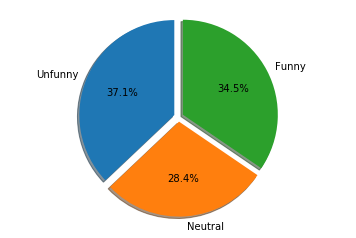

In [14]:
#pie chart of showing distribution of labels
fig1, ax1 = plt.subplots()
ax1.pie([prop_unfunny, prop_neutral,prop_funny],
       labels=["Unfunny", "Neutral", "Funny"],
       shadow=True,
       explode=[0.05,0.05,0.05],
       autopct='%1.1f%%',
       startangle=90)
ax1.axis('equal')
plt.savefig("reports/figures/pie_labels.svg")

## 4 - Final Cleaning

In this section I subject the data to final cleaning and transformations, and then save the cleaned data.

### 4.1 - Clean Text Length

In this section I will do some cleaning of the text lengths.

In [15]:
#create text_length variable
df["text_length"] = df.text.str.len()

There is no point in analyzing posts that are too short. These posts might be spam or links to jokes rather than actual jokes. Let us remove observations with very short text lengths. Specifically, we will drop posts with texts that are less than 4 characters. This will also remove texts with no text. The cutoff of three characters is kind of arbitrary, but seems safe. It is hard to imagine that there are many jokes with a punch line of only three characters.

In [16]:
n_obs_prev = df.shape[0] #want to keep track of how many obervations I am dropping
df = df[df.text_length >= 4] #subset
n_obs = df.shape[0]
print("{} observations droppped".format(n_obs_prev-n_obs))

5475 observations droppped


## 4.2 - Final Transforms

Transform the string label into a binary indicator, dropping the neutral observations along the way.

In [19]:
#drop neutrals
df = df[df.type != "Neutral"]
#binary indicator
df["funny"] = (df.type == "Funny")

Concatenate the title and submission text into a single variable, seperated by a line break and a space.

In [20]:
df["full_text"] = df.title + "\n " + df.text

In [21]:
df

,date,downs,score,text,title,ups,upvote_ratio,url,type,text_length,funny,full_text
id,,,,,,,,,,,,
6z8wju,1.505058e+09,0,1,"She cant make a Yo Mama Joke, oh wait, that’s ...",Yo Mama So Stupid.....,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8wju...,Unfunny,63.0,False,Yo Mama So Stupid.....\n She cant make a Yo Ma...
6z8vwj,1.505058e+09,0,0,\nSnacks.,What do cannibals call midgets?,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8vwj...,Unfunny,8.0,False,What do cannibals call midgets?\n \nSnacks.
6z8vgv,1.505058e+09,0,1,I only come once a year,My wife makes me feel like christmas,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8vgv...,Unfunny,23.0,False,My wife makes me feel like christmas\n I only ...
6z8vea,1.505058e+09,0,1,Pennywise.,What do you call someone who gets their 1p cha...,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8vea...,Unfunny,10.0,False,What do you call someone who gets their 1p cha...
6z8uq9,1.505058e+09,0,0,Woman's husband would always come home drunk. ...,You been drinking tonight?,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8uq9...,Unfunny,1051.0,False,You been drinking tonight?\n Woman's husband w...
6z8ts1,1.505057e+09,0,0,So they can go fuck themselves,Priests in India are allowed to have sex,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8ts1...,Unfunny,30.0,False,Priests in India are allowed to have sex\n So ...
6z8tpt,1.505057e+09,0,0,Because Trump will deport him. No illegal immi...,Why won't Hurricane Jose hit the USA?,0,0.33,https://www.reddit.com/r/Jokes/comments/6z8tpt...,Unfunny,87.0,False,Why won't Hurricane Jose hit the USA?\n Becaus...
6z8tnf,1.505057e+09,0,0,"Every time there is a powerful woman, there is...",The Thing About Irma and Jose,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8tnf...,Unfunny,76.0,False,The Thing About Irma and Jose\n Every time the...
6z8t2q,1.505057e+09,0,1,Hot air baboon,What type of monkey can fly?,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8t2q...,Unfunny,14.0,False,What type of monkey can fly?\n Hot air baboon


In [22]:
df = df.loc[:, ["funny", "full_text", "text_length"]]

In [23]:
#now split
train, test = train_test_split(df, test_size = 0.125, random_state = 123, stratify = df.funny)

In [27]:
#now save
joblib.dump(train,os.path.join(PROJECT_DIR,"data","interim","train.pkl"))
joblib.dump(test,os.path.join(PROJECT_DIR,"data","interim","test.pkl"))

['C:\\Users\\wertu\\Documents\\Datascience\\udacity-ml-capstone\\notebooks\\..\\data\\interim\\test.pkl']